In [84]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy import stats
from scipy.stats import sem
import statistics
import statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as sps

In [85]:
df = pd.read_csv('transaction data.csv')

In [86]:
df.head()

,Transaction Type,Subtype,Sales Sequence,No,Month,Quarter,Year,Date,Community,Property,...,Floor,Parking,Balcony Area,Size (Sqf),Land Size,Amount (AED),AED/Sqf,Finance Value (AED),Developer,bedroom_count
0,Sales - Off-Plan,Sell - Pre registration,Primary,102-66485-2023,12,4,2023,14-Dec-23,Palm Jumeirah,Como Residences,...,72.00000,10,6047.22000,21949.30000,6635.00000,500000000.00000,22779.77000,NaN,THE PALM- JUMEIRAH CO. L.L.C,5.00000
1,Sales - Off-Plan,Sell - Pre registration,Primary,102-52395-2023,10,4,2023,5-Oct-23,Palm Jumeirah,Ava At Palm Jumeirah By Omniyat,...,20.00000,"B1-15, B1-15A,B1-16 to B1-19, B1-19A, B1-20, ...",13269.97000,32160.25000,6635.00000,220000000.00000,6840.74000,NaN,Omniyat Properties,5.00000
2,Sales - Ready,Sale,Secondary,11-27298-2023,8,3,2023,29-Aug-23,Emirates Hills,Emirates Hills - Sector E,...,16.00000,NaN,221.00000,14596.53000,41704.36000,209000000.00000,14318.47000,NaN,Emaar Properties PJSC,6.00000
3,Sales - Off-Plan,Sell - Pre registration,Primary,102-44069-2023,9,3,2023,4-Sep-23,Palm Jumeirah,EOME,...,16.00000,NaN,221.00000,16186.37000,24921.57000,202000000.00000,12479.64000,NaN,Blue Haven Real Estate Development LLC,6.00000
4,Sales - Off-Plan,Sell - Pre registration,Primary,102-59794-2023,11,4,2023,9-Nov-23,Palm Jumeirah,EOME,...,16.00000,NaN,221.00000,16186.37000,21824.66000,200000000.00000,12356.08000,NaN,Blue Haven Real Estate Development LLC,6.00000


In [87]:
df['Land Size'].unique()

array([ 6635.  , 41704.36, 24921.57, ...,  1310.73,   436.91,   398.27])

In [88]:
# Count the number of rows with 6635 in the 'Land Size' column
count_6635 = (df['Land Size'] == 6635).sum()

# Display the count
print(f"Number of rows with 6635 in the 'Land Size' column: {count_6635}")

Number of rows with 6635 in the 'Land Size' column: 11301


In [89]:
df.columns

Index(['Transaction Type', 'Subtype', 'Sales Sequence', 'No', 'Month',
       'Quarter', 'Year', 'Date', 'Community', 'Property', 'Property Type',
       'Unit', 'Bedrooms', 'Floor', ' Parking ', 'Balcony Area', 'Size (Sqf)',
       'Land Size', 'Amount (AED)', 'AED/Sqf', 'Finance Value (AED)',
       'Developer', 'bedroom_count'],
      dtype='object')

In [90]:
df.describe()

,Month,Quarter,Year,Floor,Balcony Area,Size (Sqf),Land Size,Amount (AED),AED/Sqf,bedroom_count
count,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000
mean,6.34779,2.44439,2023.00000,15.69257,221.01632,1946.78927,6635.03820,5418341.74605,2433.17244,2.13026
std,3.38575,1.11173,0.00000,12.86318,468.21593,2331.10533,2292.30064,11162183.53265,1209.04015,1.31879
min,1.00000,1.00000,2023.00000,1.00000,8.83000,48.33000,398.27000,19079.66000,21.15000,0.00000
25%,3.00000,1.00000,2023.00000,6.00000,74.06000,799.33000,6635.00000,1700000.00000,1796.45000,1.00000
50%,6.00000,2.00000,2023.00000,15.00000,151.77000,1183.29000,6635.00000,2600000.00000,2119.98000,2.00000
75%,9.00000,3.00000,2023.00000,16.00000,221.00000,1993.71000,6635.00000,4380000.00000,2749.97000,3.00000
max,12.00000,4.00000,2023.00000,105.00000,13332.72000,33368.40000,60030.07000,500000000.00000,22779.77000,10.00000


In [91]:
df.info

<bound method DataFrame.info of        Transaction Type                  Subtype Sales Sequence  \
0      Sales - Off-Plan  Sell - Pre registration        Primary   
1      Sales - Off-Plan  Sell - Pre registration        Primary   
2         Sales - Ready                     Sale      Secondary   
3      Sales - Off-Plan  Sell - Pre registration        Primary   
4      Sales - Off-Plan  Sell - Pre registration        Primary   
...                 ...                      ...            ...   
13276     Sales - Ready                     Sale      Secondary   
13277     Sales - Ready                     Sale      Secondary   
13278     Sales - Ready                     Sale      Secondary   
13279     Sales - Ready                     Sale      Secondary   
13280     Sales - Ready                     Sale      Secondary   

                   No  Month  Quarter  Year       Date       Community  \
0      102-66485-2023     12        4  2023  14-Dec-23   Palm Jumeirah   
1      102-5239

### Data Checks and Cleaning

In [92]:
df['Transaction Type'].unique()

array(['Sales - Off-Plan', 'Sales - Ready'], dtype=object)

In [93]:
df['Property Type'].unique()

array(['Apartment', 'Villa', 'Serviced/Hotel Apartment'], dtype=object)

Looking at the property type and floor column, villa with 16 floor level looks unrealistic to be true so this column would be dropped before building our model.

In [94]:
# Count the number of rows that contain 'villa' in the 'property' column
villa_count = df['Property Type'].str.contains('Villa', case=False, na=False).sum()

# Display the count
print(f"Number of rows with 'villa' in the 'Property Type' column: {villa_count}")

Number of rows with 'villa' in the 'Property Type' column: 1980


In [95]:
# selected columns
sel_columns = ['Community', 'Transaction Type', 'bedroom_count', 'Floor',
              'Balcony Area', 'Size (Sqf)', 'Land Size', 'Amount (AED)']
new_df = df[sel_columns]

In [96]:
new_df.head()

,Community,Transaction Type,bedroom_count,Floor,Balcony Area,Size (Sqf),Land Size,Amount (AED)
0,Palm Jumeirah,Sales - Off-Plan,5.00000,72.00000,6047.22000,21949.30000,6635.00000,500000000.00000
1,Palm Jumeirah,Sales - Off-Plan,5.00000,20.00000,13269.97000,32160.25000,6635.00000,220000000.00000
2,Emirates Hills,Sales - Ready,6.00000,16.00000,221.00000,14596.53000,41704.36000,209000000.00000
3,Palm Jumeirah,Sales - Off-Plan,6.00000,16.00000,221.00000,16186.37000,24921.57000,202000000.00000
4,Palm Jumeirah,Sales - Off-Plan,6.00000,16.00000,221.00000,16186.37000,21824.66000,200000000.00000


In [97]:
new_df.rename(columns={
    'Community': 'community',
    'Transaction Type': 'transac_type',
    'Floor': 'floor',
    'Balcony Area': 'balcony_area',
    'Size (Sqf)': 'size_Sqf',
    'Land Size': 'land_size',
    'Amount (AED)': 'amount_AED'
}, inplace=True)

/tmp/ipykernel_214/3188965677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={


In [98]:
new_df.head()

,community,transac_type,bedroom_count,floor,balcony_area,size_Sqf,land_size,amount_AED
0,Palm Jumeirah,Sales - Off-Plan,5.00000,72.00000,6047.22000,21949.30000,6635.00000,500000000.00000
1,Palm Jumeirah,Sales - Off-Plan,5.00000,20.00000,13269.97000,32160.25000,6635.00000,220000000.00000
2,Emirates Hills,Sales - Ready,6.00000,16.00000,221.00000,14596.53000,41704.36000,209000000.00000
3,Palm Jumeirah,Sales - Off-Plan,6.00000,16.00000,221.00000,16186.37000,24921.57000,202000000.00000
4,Palm Jumeirah,Sales - Off-Plan,6.00000,16.00000,221.00000,16186.37000,21824.66000,200000000.00000


In [99]:
new_df['community'].unique()

array(['Palm Jumeirah', 'Emirates Hills', 'Dubai Hills Estate',
       'Tilal Al Ghaf', 'Al Barari', 'Downtown Dubai', 'Jumeirah Islands'],
      dtype=object)

In [100]:
new_df.describe()

,bedroom_count,floor,balcony_area,size_Sqf,land_size,amount_AED
count,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000,13281.00000
mean,2.13026,15.69257,221.01632,1946.78927,6635.03820,5418341.74605
std,1.31879,12.86318,468.21593,2331.10533,2292.30064,11162183.53265
min,0.00000,1.00000,8.83000,48.33000,398.27000,19079.66000
25%,1.00000,6.00000,74.06000,799.33000,6635.00000,1700000.00000
50%,2.00000,15.00000,151.77000,1183.29000,6635.00000,2600000.00000
75%,3.00000,16.00000,221.00000,1993.71000,6635.00000,4380000.00000
max,10.00000,105.00000,13332.72000,33368.40000,60030.07000,500000000.00000


A zero bedroom is unrealistic so those rows will be dropped before building the model


In [101]:
# Describe the DataFrame and round to two decimal places
description = new_df.describe().round(2)

# Set the display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the description
print(description)

       bedroom_count    floor  balcony_area  size_Sqf  land_size   amount_AED
count       13281.00 13281.00      13281.00  13281.00   13281.00     13281.00
mean            2.13    15.69        221.02   1946.79    6635.04   5418341.75
std             1.32    12.86        468.22   2331.11    2292.30  11162183.53
min             0.00     1.00          8.83     48.33     398.27     19079.66
25%             1.00     6.00         74.06    799.33    6635.00   1700000.00
50%             2.00    15.00        151.77   1183.29    6635.00   2600000.00
75%             3.00    16.00        221.00   1993.71    6635.00   4380000.00
max            10.00   105.00      13332.72  33368.40   60030.07 500000000.00


### Data Visualisation

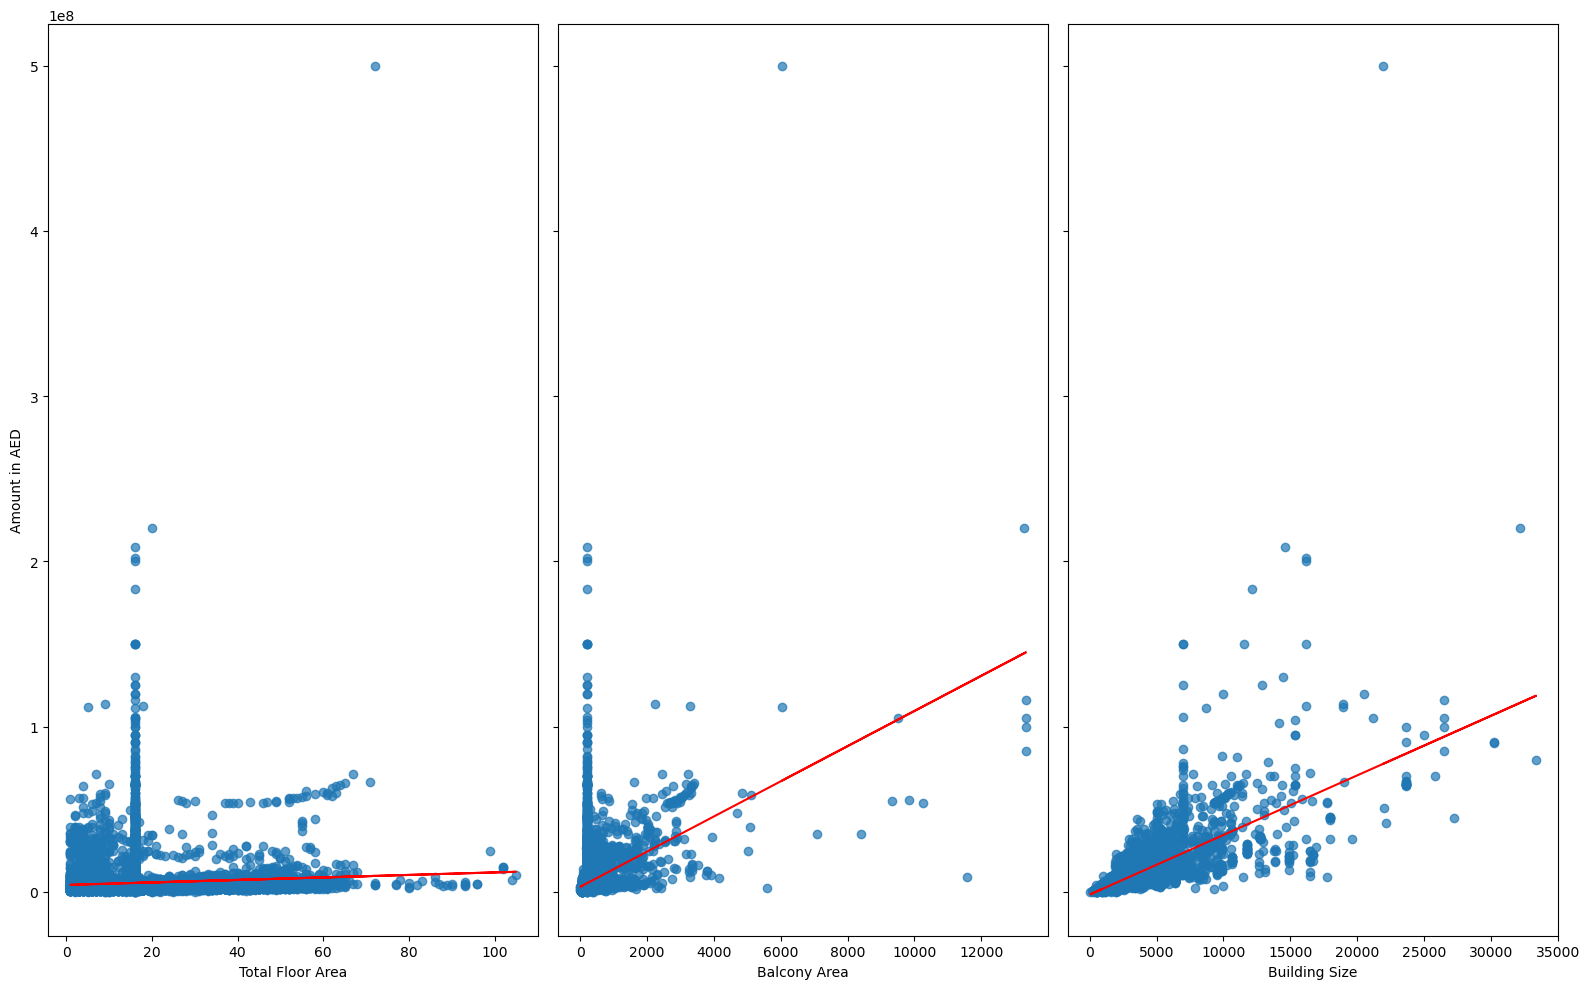

In [102]:
# visualize the relationship between the dependent and the response variables 

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 10))
m, b = np.polyfit(new_df['floor'], new_df['amount_AED'], 1)
axs[0].scatter(new_df['floor'], new_df['amount_AED'], alpha=0.7)
axs[0].plot(new_df['floor'], m*new_df['floor'] + b, color='red')
axs[0].set_xlabel('Total Floor Area')
axs[0].set_ylabel('Amount in AED')

m, b = np.polyfit(new_df['balcony_area'], new_df['amount_AED'], 1)
axs[1].scatter(new_df['balcony_area'], new_df['amount_AED'], alpha=0.7)
axs[1].plot(new_df['balcony_area'], m*new_df['balcony_area'] + b, color='red')
axs[1].set_xlabel('Balcony Area')

m, b = np.polyfit(new_df['size_Sqf'], new_df['amount_AED'], 1)
axs[2].scatter(new_df['size_Sqf'], new_df['amount_AED'], alpha=0.7)
axs[2].plot(new_df['size_Sqf'], m*new_df['size_Sqf'] + b, color='red')
axs[2].set_xlabel('Building Size')
#avoiding overlap
plt.tight_layout()  
plt.show()

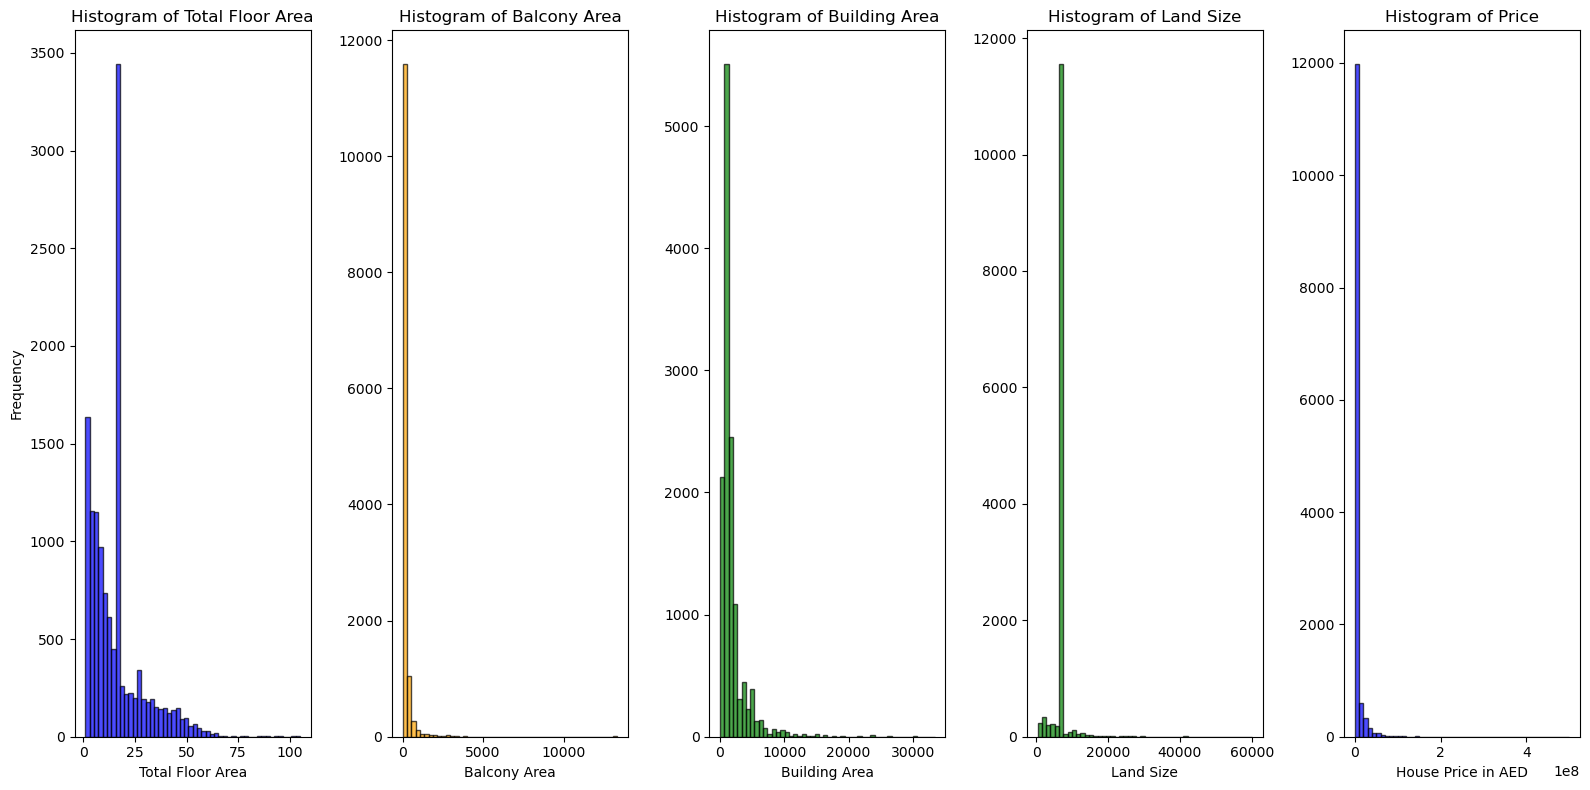

In [103]:
fig, axs = plt.subplots(1, 5, figsize=(16, 8))

# Plot histogram for Total Floor Area
axs[0].hist(new_df['floor'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_xlabel('Total Floor Area')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Total Floor Area')

# Plot histogram for Balcony area
axs[1].hist(new_df['balcony_area'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axs[1].set_xlabel('Balcony Area')
axs[1].set_title('Histogram of Balcony Area')

# Plot histogram for building Size
axs[2].hist(new_df['size_Sqf'], bins=50, alpha=0.7, color='green', edgecolor='black')
axs[2].set_xlabel('Building Area')
axs[2].set_title('Histogram of Building Area')

# Plot histogram for Land Size
axs[3].hist(new_df['land_size'], bins=50, alpha=0.7, color='green', edgecolor='black')
axs[3].set_xlabel('Land Size')
axs[3].set_title('Histogram of Land Size')

# Plot histogram for house price
axs[4].hist(new_df['amount_AED'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axs[4].set_xlabel('House Price in AED')
axs[4].set_title('Histogram of Price')

# Avoiding overlap
plt.tight_layout()
plt.show()

### Preparing Data for Model Building

created dummy variables for the categories `Sales - Off-Plan` and `Sales - Ready` within the  `transaction_type` column using the pd.get_dummies() function from Pandas. This function converts categorical variable(s) into dummy/indicator variables known as one-hot encoding.


**Transaction type** column, where `Sales - Ready` denotes that the property was ready before sales and `Sales - Off-Plan` is property that was sold before its construction.
So, for the dummy, `1` will be for the `Sales - Ready` while `0` is for the `Sales - Off-Plan`.

In [104]:
# transac_type
if 'transac_type' in new_df.columns:
    # Create the dummy variable column 'd_dummy'
    new_df.loc[:, 't_dummy'] = new_df['transac_type'].map({'Sales - Ready': 1, 'Sales - Off-Plan': 0})
else:
    print("The column 'transac_type' does not exist in the DataFrame.")

# Display the updated DataFrame
print(new_df)

            community      transac_type  bedroom_count  floor  balcony_area  \
0       Palm Jumeirah  Sales - Off-Plan           5.00  72.00       6047.22   
1       Palm Jumeirah  Sales - Off-Plan           5.00  20.00      13269.97   
2      Emirates Hills     Sales - Ready           6.00  16.00        221.00   
3       Palm Jumeirah  Sales - Off-Plan           6.00  16.00        221.00   
4       Palm Jumeirah  Sales - Off-Plan           6.00  16.00        221.00   
...               ...               ...            ...    ...           ...   
13276  Downtown Dubai     Sales - Ready           0.00  14.00         58.99   
13277  Downtown Dubai     Sales - Ready           2.00  10.00         67.49   
13278  Downtown Dubai     Sales - Ready           0.00  25.00        221.00   
13279  Downtown Dubai     Sales - Ready           1.00   2.00         65.98   
13280  Downtown Dubai     Sales - Ready           1.00  16.00         57.05   

       size_Sqf  land_size   amount_AED  t_dummy  


/tmp/ipykernel_214/502847155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 't_dummy'] = new_df['transac_type'].map({'Sales - Ready': 1, 'Sales - Off-Plan': 0})


In [105]:
#checking whether it worked perfectly
new_df[['transac_type', 't_dummy']].head

<bound method NDFrame.head of            transac_type  t_dummy
0      Sales - Off-Plan        0
1      Sales - Off-Plan        0
2         Sales - Ready        1
3      Sales - Off-Plan        0
4      Sales - Off-Plan        0
...                 ...      ...
13276     Sales - Ready        1
13277     Sales - Ready        1
13278     Sales - Ready        1
13279     Sales - Ready        1
13280     Sales - Ready        1

[13281 rows x 2 columns]>

### Correlation Matrix (Pearson)

For better reliability of the model results, the variables should not be highly correlated, so the Pearson correlation matrix is used to test this condition.

In [106]:
# Checking for NAs or null values in the new_df frame and count of all columns
NANs_incolumns = new_df.isna().sum()
print("NAN or null values count per column (including zeros):")
print(NANs_incolumns)

NAN or null values count per column (including zeros):
community        0
transac_type     0
bedroom_count    0
floor            0
balcony_area     0
size_Sqf         0
land_size        0
amount_AED       0
t_dummy          0
dtype: int64


In [107]:
new_df.head(10)

,community,transac_type,bedroom_count,floor,balcony_area,size_Sqf,land_size,amount_AED,t_dummy
0,Palm Jumeirah,Sales - Off-Plan,5.00,72.00,6047.22,21949.30,6635.00,500000000.00,0
1,Palm Jumeirah,Sales - Off-Plan,5.00,20.00,13269.97,32160.25,6635.00,220000000.00,0
2,Emirates Hills,Sales - Ready,6.00,16.00,221.00,14596.53,41704.36,209000000.00,1
3,Palm Jumeirah,Sales - Off-Plan,6.00,16.00,221.00,16186.37,24921.57,202000000.00,0
4,Palm Jumeirah,Sales - Off-Plan,6.00,16.00,221.00,16186.37,21824.66,200000000.00,0
5,Palm Jumeirah,Sales - Ready,7.00,16.00,221.00,12137.92,26032.95,183000000.00,1
6,Palm Jumeirah,Sales - Ready,5.00,16.00,221.00,7000.04,60030.07,150000000.00,1
7,Emirates Hills,Sales - Ready,6.00,16.00,221.00,11526.40,32932.57,150000000.00,1
8,Palm Jumeirah,Sales - Ready,6.00,16.00,221.00,7000.04,15771.20,150000000.00,1
9,Palm Jumeirah,Sales - Off-Plan,6.00,16.00,221.00,16186.37,23789.62,150000000.00,0


The cleaned up data has a land size column with the same values so I will drop that column.

In [108]:
# selected columns
sel_columns = ['community', 'transac_type', 'bedroom_count', 'land_size', 'balcony_area',
       'size_Sqf', 'amount_AED', 't_dummy']
new_df1 = new_df[sel_columns]

In [109]:
new_df1.head()

,community,transac_type,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy
0,Palm Jumeirah,Sales - Off-Plan,5.00,6635.00,6047.22,21949.30,500000000.00,0
1,Palm Jumeirah,Sales - Off-Plan,5.00,6635.00,13269.97,32160.25,220000000.00,0
2,Emirates Hills,Sales - Ready,6.00,41704.36,221.00,14596.53,209000000.00,1
3,Palm Jumeirah,Sales - Off-Plan,6.00,24921.57,221.00,16186.37,202000000.00,0
4,Palm Jumeirah,Sales - Off-Plan,6.00,21824.66,221.00,16186.37,200000000.00,0


In [110]:
# Calculate the correlation matrix for numerical variables only
correlation_matrix = new_df1.corr(numeric_only=True).round(2)
correlation_matrix

,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy
bedroom_count,1.00,0.19,0.24,0.75,0.53,-0.01
land_size,0.19,1.00,-0.00,0.49,0.51,0.04
balcony_area,0.24,-0.00,1.00,0.47,0.45,-0.02
size_Sqf,0.75,0.49,0.47,1.00,0.75,-0.00
amount_AED,0.53,0.51,0.45,0.75,1.00,-0.01
t_dummy,-0.01,0.04,-0.02,-0.00,-0.01,1.00


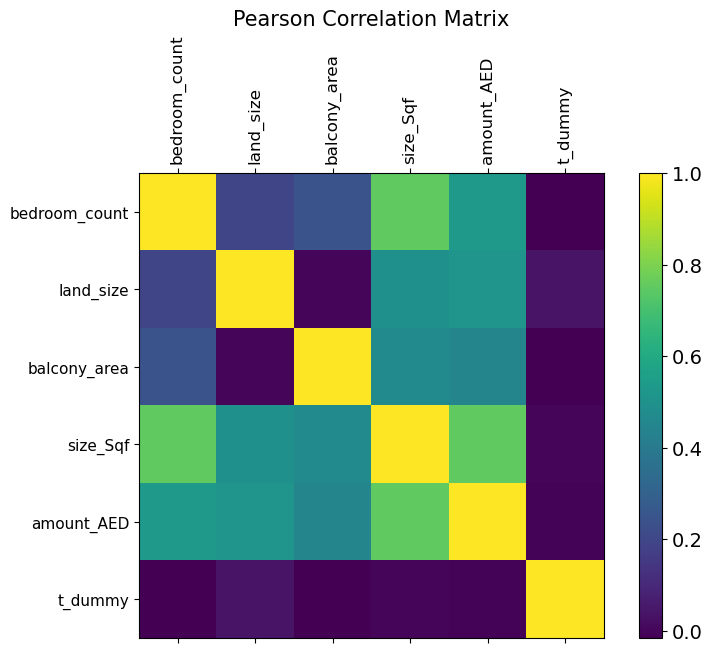

In [111]:
# Select only numeric columns
new_df1= new_df1.select_dtypes(include=[np.number]) 

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 6))
plt.matshow(new_df1.corr(), fignum=f.number)  
plt.xticks(range(new_df1.shape[1]), new_df1.columns, fontsize=12, rotation=90)
plt.yticks(range(new_df1.shape[1]), new_df1.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson Correlation Matrix', fontsize=15)
plt.show()

The matrix plots have shown no high collinearity among the variables. But for the sake of the reliability of our results, it will be further investigated using other matrices like the Variance Inflation Factor (VIF).

In [112]:
new_df.head()

,community,transac_type,bedroom_count,floor,balcony_area,size_Sqf,land_size,amount_AED,t_dummy
0,Palm Jumeirah,Sales - Off-Plan,5.00,72.00,6047.22,21949.30,6635.00,500000000.00,0
1,Palm Jumeirah,Sales - Off-Plan,5.00,20.00,13269.97,32160.25,6635.00,220000000.00,0
2,Emirates Hills,Sales - Ready,6.00,16.00,221.00,14596.53,41704.36,209000000.00,1
3,Palm Jumeirah,Sales - Off-Plan,6.00,16.00,221.00,16186.37,24921.57,202000000.00,0
4,Palm Jumeirah,Sales - Off-Plan,6.00,16.00,221.00,16186.37,21824.66,200000000.00,0


In [113]:
# selected columns
sel_columns = ['community', 'transac_type', 'bedroom_count', 'land_size', 'balcony_area',
       'size_Sqf', 'amount_AED', 't_dummy']
new_df2 = new_df[sel_columns]

In [114]:
new_df2.head()

,community,transac_type,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy
0,Palm Jumeirah,Sales - Off-Plan,5.00,6635.00,6047.22,21949.30,500000000.00,0
1,Palm Jumeirah,Sales - Off-Plan,5.00,6635.00,13269.97,32160.25,220000000.00,0
2,Emirates Hills,Sales - Ready,6.00,41704.36,221.00,14596.53,209000000.00,1
3,Palm Jumeirah,Sales - Off-Plan,6.00,24921.57,221.00,16186.37,202000000.00,0
4,Palm Jumeirah,Sales - Off-Plan,6.00,21824.66,221.00,16186.37,200000000.00,0


In [115]:
new_df2['community'].unique()

array(['Palm Jumeirah', 'Emirates Hills', 'Dubai Hills Estate',
       'Tilal Al Ghaf', 'Al Barari', 'Downtown Dubai', 'Jumeirah Islands'],
      dtype=object)

In [116]:
# One-hot encode the 'neighbourhood dummy' column
new_df2 = pd.get_dummies(new_df2, columns=['community'], drop_first=True, dtype=int)

In [117]:
new_df2.head(10)

,transac_type,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy,community_Downtown Dubai,community_Dubai Hills Estate,community_Emirates Hills,community_Jumeirah Islands,community_Palm Jumeirah,community_Tilal Al Ghaf
0,Sales - Off-Plan,5.00,6635.00,6047.22,21949.30,500000000.00,0,0,0,0,0,1,0
1,Sales - Off-Plan,5.00,6635.00,13269.97,32160.25,220000000.00,0,0,0,0,0,1,0
2,Sales - Ready,6.00,41704.36,221.00,14596.53,209000000.00,1,0,0,1,0,0,0
3,Sales - Off-Plan,6.00,24921.57,221.00,16186.37,202000000.00,0,0,0,0,0,1,0
4,Sales - Off-Plan,6.00,21824.66,221.00,16186.37,200000000.00,0,0,0,0,0,1,0
5,Sales - Ready,7.00,26032.95,221.00,12137.92,183000000.00,1,0,0,0,0,1,0
6,Sales - Ready,5.00,60030.07,221.00,7000.04,150000000.00,1,0,0,0,0,1,0
7,Sales - Ready,6.00,32932.57,221.00,11526.40,150000000.00,1,0,0,1,0,0,0
8,Sales - Ready,6.00,15771.20,221.00,7000.04,150000000.00,1,0,0,0,0,1,0
9,Sales - Off-Plan,6.00,23789.62,221.00,16186.37,150000000.00,0,0,0,0,0,1,0


### METHODS

### Linear Regression Model (LRM)

LRM is a statistical model that is employed in data analysis to establish the connection between variables (dependent and independent). The algorithm of this works on the premise that there exists a direct relationship between the variables. 

**Model:** 

\begin{equation}
y = \beta_0 + \beta_1X_1 + ...+ \beta_nX_n + \epsilon
\end{equation}

Where: dependent variable is `y`, intercept is `β₀`,  coefficients of `X` variables is `β`, `X`= independent variables, `ε` = error term. 

LRM is commonly utilized because of its straightforwardness and ease of interpretation. As per [Montgomery et al (2021)](http://sutlib2.sut.ac.th/sut_contents/H133678.pdf), the model offers a basic indication of the extent of the connection between variables during the initial analysis phase.

###  Log-Linear Regression Model
It is utilised when the dependent variable is anticipated to increase exponentially instead of linearly. This approach includes applying the natural logarithm to the outcome variable before conducting linear regression on the modified variable.

Log-linear is especially effective in handling heteroscedasticity and representing multiplicative impacts. It helps to stabilize the variability of error terms and can convert a nonlinear association into a linear one, simplifying the modeling and interpretation process ([Von Eye et al., 2012](https://wires.onlinelibrary.wiley.com/doi/pdf/10.1002/wics.203)).

###  Model Building 

In [118]:
# Count the number of rows where bedroom_count is zero
zero_bedroom_count = (new_df2['bedroom_count'] == 0).sum()

print(f"Number of rows with zero in the 'bedroom_count' column: {zero_bedroom_count}")

Number of rows with zero in the 'bedroom_count' column: 594


In [119]:
# drop rows where bedroom_count is zero
new_df2 = new_df2[new_df2['bedroom_count'] != 0]

In [120]:
# Count the number of rows where bedroom_count is zero
zero_bedroom_count = (new_df2['bedroom_count'] == 0).sum()

print(f"Number of rows with zero in the 'bedroom_count' column: {zero_bedroom_count}")

Number of rows with zero in the 'bedroom_count' column: 0


In [121]:
new_df2.columns

Index(['transac_type', 'bedroom_count', 'land_size', 'balcony_area',
       'size_Sqf', 'amount_AED', 't_dummy', 'community_Downtown Dubai',
       'community_Dubai Hills Estate', 'community_Emirates Hills',
       'community_Jumeirah Islands', 'community_Palm Jumeirah',
       'community_Tilal Al Ghaf'],
      dtype='object')

### Handling Outliers 
There are points in the amount colun with very large values compared to the rest, and may represent properties that are unusually priced due to unique characteristics such as luxury features. These 27 rows would be excluded in the model

In [122]:
# To confirm if the removal worked
top_30_max_prices = new_df2.nlargest(30, 'amount_AED')

# Display only the price column
print(top_30_max_prices['amount_AED'])

0    500000000.00
1    220000000.00
2    209000000.00
3    202000000.00
4    200000000.00
5    183000000.00
6    150000000.00
7    150000000.00
8    150000000.00
9    150000000.00
10   130000000.00
11   125000000.00
12   125000000.00
13   120000000.00
14   120000000.00
15   116000000.00
16   113734800.00
17   112500000.00
18   111766800.00
19   111000000.00
20   106000000.00
21   105000000.00
22   105000000.00
23   104000000.00
24   102000000.00
25   100000000.00
26   100000000.00
27    95000000.00
28    95000000.00
29    95000000.00
Name: amount_AED, dtype: float64


In [123]:
# Identify the top 27 largest values by 'amount_AED'
top_27 = new_df2.nlargest(27, 'amount_AED').index

# Drop these rows from the DataFrame
new_df2 = new_df2.drop(top_27)

# Confirm the removal worked by displaying the current top values after removal
print(new_df2.nlargest(30, 'amount_AED')['amount_AED'])


27   95000000.00
28   95000000.00
29   95000000.00
30   91000000.00
31   90500000.00
32   90188000.00
33   86245000.00
34   85500000.00
35   82000000.00
36   81500000.00
37   80000000.00
38   78750000.00
39   78000000.00
40   76000000.00
41   75500000.00
42   75000000.00
43   74000000.00
44   72000000.00
45   71241800.00
46   71218412.00
47   70330000.00
48   70000000.00
49   70000000.00
50   70000000.00
51   70000000.00
52   70000000.00
53   70000000.00
54   66903360.00
55   66542400.00
56   66500000.00
Name: amount_AED, dtype: float64


In [124]:
#Handling the outlier in the price column
# Get the top 30 minimum values in the price column
top_30_min_prices = new_df2.nsmallest(30, 'amount_AED')

# Display only the price column
print(top_30_min_prices['amount_AED'])

13280    19079.66
13279    28476.75
13277    38319.58
13275    58258.68
13274    66000.00
13269   131977.43
13268   137955.82
13267   144211.86
13266   163909.51
13263   300000.00
13262   307125.79
13261   315000.00
13259   327000.00
13257   350000.00
13258   350000.00
13256   390000.00
13255   420000.00
13253   450000.00
13252   472500.00
13251   487500.00
13250   499999.00
13248   500000.00
13249   500000.00
13245   527500.00
13246   527500.00
13247   527500.00
13244   535000.00
13242   550000.00
13243   550000.00
13241   562132.00
Name: amount_AED, dtype: float64


In [125]:
# Identify the top 9 lowest values by 'amount_AED'
lowest_9 = new_df2.nsmallest(9, 'amount_AED').index

# Drop these rows from the DataFrame
new_df2 = new_df2.drop(lowest_9)

# Optionally, confirm the removal by displaying the current lowest values after removal
print(new_df2.nsmallest(30, 'amount_AED')['amount_AED'])


13263   300000.00
13262   307125.79
13261   315000.00
13259   327000.00
13257   350000.00
13258   350000.00
13256   390000.00
13255   420000.00
13253   450000.00
13252   472500.00
13251   487500.00
13250   499999.00
13248   500000.00
13249   500000.00
13245   527500.00
13246   527500.00
13247   527500.00
13244   535000.00
13242   550000.00
13243   550000.00
13241   562132.00
13240   570000.00
13235   600000.00
13236   600000.00
13237   600000.00
13238   600000.00
13231   638718.00
13226   650000.00
13227   650000.00
13222   675000.00
Name: amount_AED, dtype: float64


In [126]:
#Building the LR model
X = new_df2[['land_size', 'balcony_area', 'size_Sqf', 't_dummy', 'bedroom_count', 'community_Emirates Hills', 
        'community_Dubai Hills Estate', 'community_Palm Jumeirah', 'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']]
X = sm.add_constant(X)
# y variable
y = new_df2['amount_AED']
# OLS model
LR_model = sm.OLS(y, X).fit()
# summary of model
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:             amount_AED   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     3530.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:25:22   Log-Likelihood:            -2.1100e+05
No. Observations:               12651   AIC:                         4.220e+05
Df Residuals:                   12639   BIC:                         4.221e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [127]:
# Prepare the features matrix 'X' and target vector 'y'
X = new_df2[['land_size', 'balcony_area', 'size_Sqf', 't_dummy', 'bedroom_count', 
             'community_Emirates Hills', 'community_Dubai Hills Estate', 'community_Palm Jumeirah', 
             'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']]
X = sm.add_constant(X)  # Adding a constant column for the intercept
y = new_df2['amount_AED']

# Building the OLS model
LR_model = sm.OLS(y, X).fit()

# Convert summary to DataFrame
results_as_html = LR_model.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

# Set display options to show 5 decimal places and avoid scientific notation
pd.set_option('display.float_format', lambda x: f'{x:.5f}')

# Print the DataFrame
print(results_df)

                                        coef      std err         t   P>|t|  \
const                        -15630000.00000 354000.00000 -44.20500 0.00000   
land_size                          535.34990     27.79800  19.25900 0.00000   
balcony_area                      1781.07450    119.72300  14.87700 0.00000   
size_Sqf                          2541.92040     41.02400  61.96200 0.00000   
t_dummy                       -1094000.00000  81800.00000 -13.37300 0.00000   
bedroom_count                  1019000.00000  53000.00000  19.23100 0.00000   
community_Emirates Hills       5638000.00000 755000.00000   7.46500 0.00000   
community_Dubai Hills Estate   9665000.00000 338000.00000  28.61300 0.00000   
community_Palm Jumeirah       13450000.00000 339000.00000  39.71800 0.00000   
community_Tilal Al Ghaf        5717000.00000 342000.00000  16.70300 0.00000   
community_Downtown Dubai      10790000.00000 340000.00000  31.79000 0.00000   
community_Jumeirah Islands     6868000.00000 517000.

/tmp/ipykernel_214/3731352895.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [152]:
# coefficients
intercept, *coefficients = LR_model.params

# p-values
p_values = LR_model.pvalues

# model equation
print(f"y = {intercept:.2f} + {coefficients[0]:.2f} * X1 + ... + {coefficients[-1]:.2f} * Xn")
print(f"R^2 = {LR_model.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.4f}")

# predictors
feature_names = ['land_size', 'balcony_area', 'size_Sqf', 't_dummy', 'bedroom_count', 
             'community_Emirates Hills', 'community_Dubai Hills Estate', 'community_Palm Jumeirah', 
             'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.4f}")

y = -15633316.56 + 535.35 * X1 + ... + 6868216.46 * Xn
R^2 = 0.75444
p-value of intercept = 0.0000
p-value of land_size = 0.0000
p-value of balcony_area = 0.0000
p-value of size_Sqf = 0.0000
p-value of t_dummy = 0.0000
p-value of bedroom_count = 0.0000
p-value of community_Emirates Hills = 0.0000
p-value of community_Dubai Hills Estate = 0.0000
p-value of community_Palm Jumeirah = 0.0000
p-value of community_Tilal Al Ghaf = 0.0000
p-value of community_Downtown Dubai = 0.0000
p-value of community_Jumeirah Islands = 0.0000


/tmp/ipykernel_214/934324002.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.4f}")
/tmp/ipykernel_214/934324002.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.4f}")


### Checking Multicollinearity Using VIF

In [129]:
# Variance Inflation Factor (VIF) helps in dropping correlated variables using a threshold
'''
Calculate VIF for each feature in the DataFrame. 
Set a threshold (default is 5). 
So, features with VIF greater than this threshold, it will be removed. 
Add a constant to VIF calculations to ensure correct results. 
Repeat the process until no feature has a VIF above the threshold. 
Return the cleaned DataFrame with multicollinear features removed.
'''
features = ['land_size', 'balcony_area', 'size_Sqf', 't_dummy', 'bedroom_count']

#  VIF constant
X = add_constant(new_df2[features])

# df and their VIFs
vif_d = pd.DataFrame()
vif_d['Feature'] = X.columns

# VIF 
vif_d['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Initial VIF values:")
print(vif_d)

# removing features with VIF > threshold
while vif_d[vif_d['Feature'] != 'const']['VIF'].max() > 5:
    # maximum VIF
    remove = vif_d.sort_values('VIF', ascending=False).iloc[0]
    if remove['Feature'] == 'const':
        break
    
    # Drop high VIF
    X = X.drop(columns=remove['Feature'])
    vif_d = pd.DataFrame()
    vif_d['Feature'] = X.columns
    vif_d['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print(f"\nDropping '{remove['Feature']}' with VIF: {remove['VIF']}")
    print(vif_d)
    
print("\nFinal set of features after VIF reduction:")
print(vif_d)

Initial VIF values:
         Feature      VIF
0          const 24.00794
1      land_size  1.73801
2   balcony_area  1.40652
3       size_Sqf  4.74084
4        t_dummy  1.00143
5  bedroom_count  2.98995

Final set of features after VIF reduction:
         Feature      VIF
0          const 24.00794
1      land_size  1.73801
2   balcony_area  1.40652
3       size_Sqf  4.74084
4        t_dummy  1.00143
5  bedroom_count  2.98995


### Residual Analysis
It helps in analysing the regression assumptions

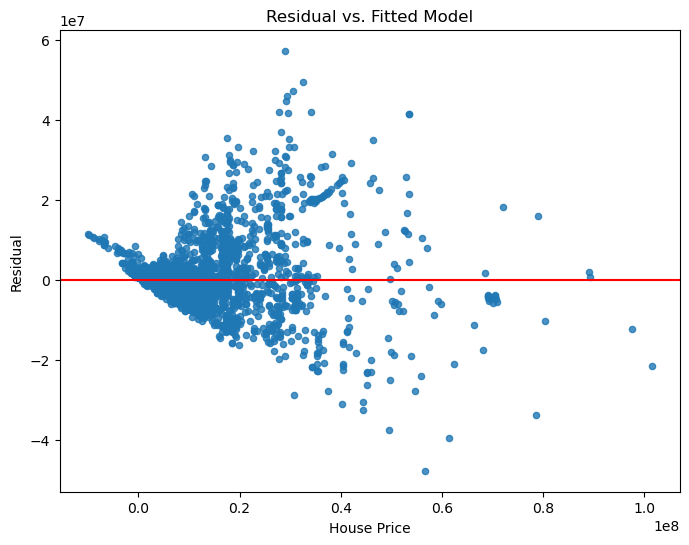

In [130]:
# Scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot 
plt.scatter(LR_model.fittedvalues, LR_model.resid, alpha=0.8, s=20)

# title
plt.xlabel('House Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Model')

# include reg. line
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

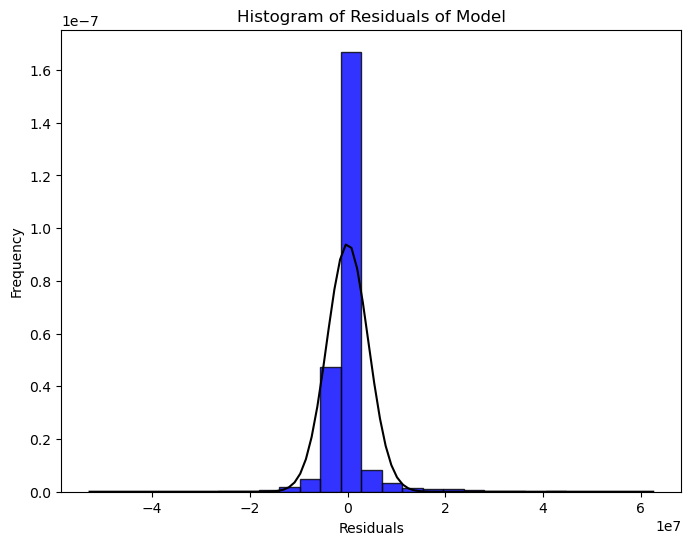

In [131]:
#Histogram of model 
residuals = LR_model.resid

# fig. size
plt.figure(figsize=(8, 6))  
plt.hist(residuals, bins=25, color='blue', edgecolor='black', alpha=0.8, density=True)

# distribution of residuals computation
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
# normal distribution curve
plt.plot(x, p, 'black', linewidth=1.5)
# title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of Model')
# show plot
plt.show()

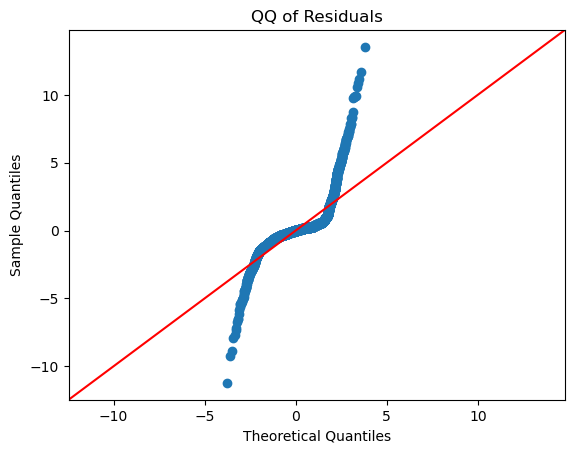

In [132]:
# QQ plot
fig = sm.qqplot(LR_model.resid, fit=True, line="45")
plt.title('QQ of Residuals')
# show plot
plt.show()

Points off the reference line at the upper and bottom section, therefore, further model improvement is required

### Discussion of the four conditions

- Linear relationship

The points in the residual plot do not bounce randomly around the x-axis (residual=0). Therefore, it looks like there is no linear relationship between the variables.

- Independent errors

The points in the residual plot are not randomly distributed and some clusters/patterns can be seen. Therefore, it is unlikely that the errors are independently distributed.

- Normally distributed errors

The histogram is asymmetric and shows some kind of skewness, with more data points clustered to the left of residual=0.

The QQ plot shows that the residuals deviates from the theoretical quantiles when the residual value is very small or large.

Therefore, it is not likely that the residuals are normally distributed.

- Equal variance

The points do not form a horizontal band around residual=0, and the range of residuals increases with the fitted y value. Therefore, it is unlikely that the residuals have equal variance.

In [133]:
new_df2.head()

,transac_type,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy,community_Downtown Dubai,community_Dubai Hills Estate,community_Emirates Hills,community_Jumeirah Islands,community_Palm Jumeirah,community_Tilal Al Ghaf
27,Sales - Off-Plan,6.00000,19067.24000,221.00000,15329.23000,95000000.00000,0,0,0,0,0,1,0
28,Sales - Off-Plan,6.00000,18948.84000,221.00000,15329.23000,95000000.00000,0,0,0,0,0,1,0
29,Sales - Ready,5.00000,39243.28000,221.00000,25000.25000,95000000.00000,1,0,0,1,0,0,0
30,Sales - Off-Plan,8.00000,25301.64000,221.00000,30211.86000,91000000.00000,0,0,0,0,0,0,1
31,Sales - Off-Plan,7.00000,26921.09000,221.00000,23642.59000,90500000.00000,0,0,0,0,0,0,1


### Log Transformation

In [134]:
#  logarithms of variables 
x_variables = ['amount_AED', 'land_size', 'balcony_area', 'size_Sqf', 'bedroom_count']
log_x_vars = []
for x in x_variables:
    new_df2[f"log_{x}"] = np.log(new_df2[x])
    log_x_vars.append(f"log_{x}")

In [135]:
new_df2.head()

,transac_type,bedroom_count,land_size,balcony_area,size_Sqf,amount_AED,t_dummy,community_Downtown Dubai,community_Dubai Hills Estate,community_Emirates Hills,community_Jumeirah Islands,community_Palm Jumeirah,community_Tilal Al Ghaf,log_amount_AED,log_land_size,log_balcony_area,log_size_Sqf,log_bedroom_count
27,Sales - Off-Plan,6.00000,19067.24000,221.00000,15329.23000,95000000.00000,0,0,0,0,0,1,0,18.36939,9.85573,5.39816,9.63752,1.79176
28,Sales - Off-Plan,6.00000,18948.84000,221.00000,15329.23000,95000000.00000,0,0,0,0,0,1,0,18.36939,9.84950,5.39816,9.63752,1.79176
29,Sales - Ready,5.00000,39243.28000,221.00000,25000.25000,95000000.00000,1,0,0,1,0,0,0,18.36939,10.57754,5.39816,10.12664,1.60944
30,Sales - Off-Plan,8.00000,25301.64000,221.00000,30211.86000,91000000.00000,0,0,0,0,0,0,1,18.32637,10.13862,5.39816,10.31599,2.07944
31,Sales - Off-Plan,7.00000,26921.09000,221.00000,23642.59000,90500000.00000,0,0,0,0,0,0,1,18.32086,10.20067,5.39816,10.07081,1.94591


In [136]:
#log modelling
# detailing with zeros or negative that cannot be log-transformed
new_df2['log_land_size'] = np.log(new_df2['land_size'].clip(lower=1))
new_df2['log_balcony_area'] = np.log(new_df2['balcony_area'].clip(lower=1))
new_df2['log_size_Sqf'] = np.log(new_df2['size_Sqf'].clip(lower=1))
new_df2['log_bedroom_count'] = np.log(new_df2['bedroom_count'].clip(lower=1))
new_df2['log_amount_AED'] = np.log(new_df2['amount_AED'].clip(lower=1))

#  explanatory variables
X = new_df2[['log_land_size', 'log_balcony_area', 'log_size_Sqf', 't_dummy', 'log_bedroom_count', 'community_Emirates Hills', 
        'community_Dubai Hills Estate', 'community_Palm Jumeirah', 'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']]
X = sm.add_constant(X) # set constant
y = new_df2['log_amount_AED'] # explained variable

log_LR_model = sm.OLS(y, X).fit()   

# summary of model
print(log_LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_amount_AED   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     7632.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:25:56   Log-Likelihood:                -2918.2
No. Observations:               12651   AIC:                             5860.
Df Residuals:                   12639   BIC:                             5950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Multicollinearity has been mitigated as evident in the reduced  `condition number` `(463)` and improved model explanatory power (`R-squared`) from `0.754` to `0.869`, hence reliability is improved.

In [151]:
# coefficients
intercept, *coefficients = log_LR_model.params

# p-values
p_values = log_LR_model.pvalues

# model equation
print(f"y = {intercept:.2f} + {coefficients[0]:.2f} * X1 + ... + {coefficients[-1]:.2f} * Xn")
print(f"R^2 = {log_LR_model.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.4f}")

# predictors
feature_names = ['log_land_size', 'log_balcony_area', 'log_size_Sqf', 't_dummy', 'log_bedroom_count', 'community_Emirates Hills', 
        'community_Dubai Hills Estate', 'community_Palm Jumeirah', 'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.4f}")

y = 4.63 + 0.23 * X1 + ... + 0.57 * Xn
R^2 = 0.86915
p-value of intercept = 0.0000
p-value of log_land_size = 0.0000
p-value of log_balcony_area = 0.0000
p-value of log_size_Sqf = 0.0000
p-value of t_dummy = 0.0000
p-value of log_bedroom_count = 0.0000
p-value of community_Emirates Hills = 0.0000
p-value of community_Dubai Hills Estate = 0.0000
p-value of community_Palm Jumeirah = 0.0000
p-value of community_Tilal Al Ghaf = 0.0000
p-value of community_Downtown Dubai = 0.0000
p-value of community_Jumeirah Islands = 0.0000


/tmp/ipykernel_214/1321164103.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.4f}")
/tmp/ipykernel_214/1321164103.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.4f}")


### Log Residual Analysis

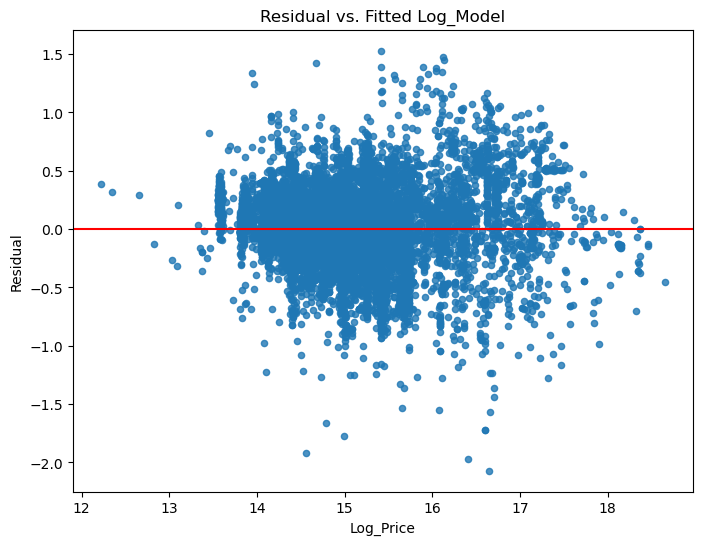

In [138]:
#scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot 
plt.scatter(log_LR_model.fittedvalues, log_LR_model.resid, alpha=0.8, s=20)
# title
plt.xlabel('Log_Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Log_Model')
# include reg. line
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

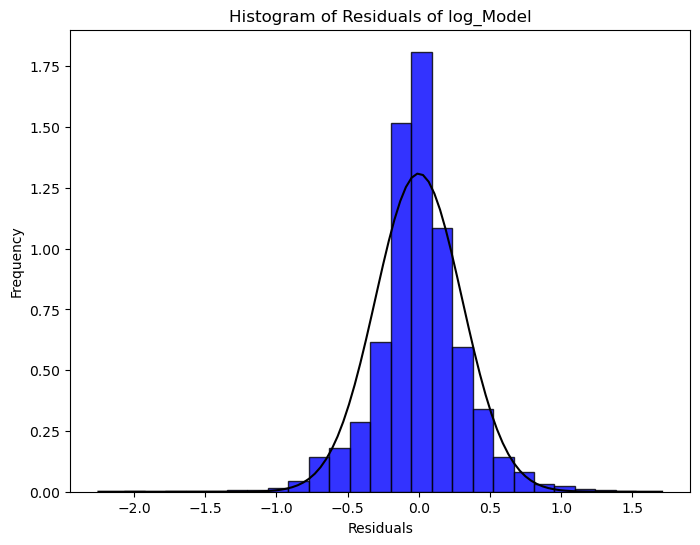

In [78]:
#Histogram of log_model 
residuals = log_LR_model.resid
# fig. size
plt.figure(figsize=(8, 6))  
plt.hist(residuals, bins=25, color='blue', edgecolor='black', alpha=0.8, density=True)

# distribution of residuals computation
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
# normal distribution curve
plt.plot(x, p, 'black', linewidth=1.5)
# title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of log_Model')
# show plot
plt.show()

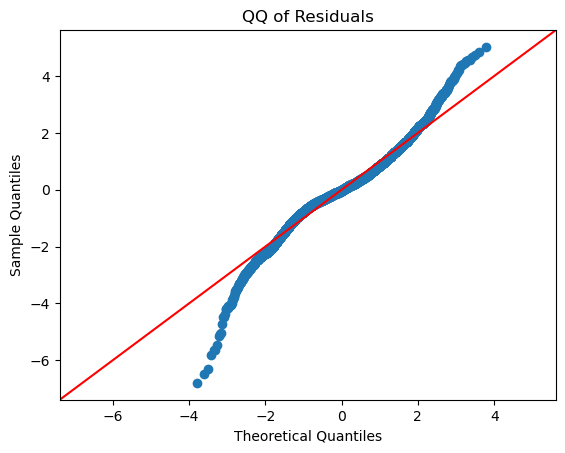

In [79]:
# QQ plot
fig = sm.qqplot(log_LR_model.resid, fit=True, line="45")
plt.title('QQ of Residuals')
# show plot
plt.show()

### Statistical tests of the four conditions 


 **- Linear relationship**

Using the Rainbow test for testing the linear relationship. Details can be found [in this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.diagnostic.linear_rainbow.html).

This test assumes residuals are homoskedastic (the null hypothesis) and may reject a correct linear specification if the residuals are heteroskedastic and the p value is less than or equal to the predefined significance level (usually 0.05).

In [155]:
test_rainbow = statsmodels.stats.diagnostic.linear_rainbow(log_LR_model)
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the rainbow test: {:.4f}".format(test_rainbow[1]))

The p value of the rainbow test: 0.0000


Since the p value is less than 0.05, we will reject the null hypothesis. This dataset and model does not meet the linear relationship condition.

### Independent errors

Using the Durbin-Watson test for testing the independent errors. 

The details of Durbin-Watson test can be found [in this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.stattools.durbin_watson.html).

This test assumes that there is no serial correlation in the residuals. 

This statistic will always be between 0 and 4. 

If there is no serial correlation, the test statistic equals 2. 

The closer to 0, the more evidence for positive serial correlation. 

The closer to 4, the more evidence for negative serial correlation. 

Empirically, if the test statistic is between 1 and 2, it is likely that there is no serial correlation in the residuals.

Unfortunately, the statsmodels library does not provide the p value of the Durbin-Watson test.

The result below shows that this model has a Durbin Watson test statistic of 1.52, which demonstrates that there might be serial correlation in this model and the residuals are not independently distributed.

In [158]:
test_dw = statsmodels.stats.stattools.durbin_watson(log_LR_model.resid)
print("Durbin-Watson test statistic is: {:.4f}".format(test_dw))

Durbin-Watson test statistic is: 1.5239


**Normally distributed errors**

Using the Jarque-Bera test for testing the normality of residuals. 

The details of Jarque-Bera test can be found in [this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.stattools.jarque_bera.html).

The null hypothesis of this test is that the data is normally distributed.

This test will return a tuple of four values, namely the Jarque-Bera test statistic, p value of the test statistic, estimated skewness of the data, and estimated kurtosis of the data.

In [159]:
test_JB = statsmodels.stats.stattools.jarque_bera(log_LR_model.resid)
print("The p value of the Jarque Bera test: {:.4f}".format(test_JB[1]))

The p value of the Jarque Bera test: 0.0000


Since the p value is less than 0.05, we will reject the null hypothesis and conclude that the residuals are not normally distributed.

**Equal variance**

Using the Goldfeld-Quandt homoskedasticity test here to determine if heteroscedasticity is present in a regression model.

The details of this test can be found in [this link](https://www.statsmodels.org/v0.13.5/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html).

Note that the usage and parameters of this test are different from the above tests. This test contains two essential input data:

- y: the dependent variable (or endogenous variable)
- x: the independent variables (or regressors, or exogenous variable)

The null hypothesis is that the variance in the two sub-samples are the same. The alternative hypothesis can be increasing (i.e. the variance in the second sample is larger than in the first), or decreasing or two-sided.

This test will return a tuple of four values, namely the Jarque-Bera test statistic, p value of the test statistic, estimated skewness of the data, and the estimated kurtosis of the data.


This model object contains a lot of information, including the input data and the model result.

Output of this test:
This test will return a tuple of at least three values, namely the test statistic, p value of the test statistic, and the ordering used in the alternative.

In [163]:
statsmodels.stats.diagnostic.het_goldfeldquandt(log_LR_model.model.endog, log_LR_model.model.exog)

(0.27899640570521106, 0.9999999999999999, 'increasing')

As the p value is greater than 0.05, we will accept the null hypothesis and conclude that the residuals have equal variance.

### Hypothesis Testing 

In [80]:
# level of significance
alpha = 0.05

In [81]:
# numeric columns
numeric = new_df2.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(numeric)):
    for j in range(i+1, len(numeric)):
        col1 = numeric[i]
        col2 = numeric[j]

        # standard deviations
        std1 = new_df2[col1].std()
        std2 = new_df2[col2].std()

        # Calculate the ratio
        std_ratio = std1 / std2
        print(f"Standard deviation ratio for {col1} and {col2} = {std_ratio}")

        # verify if sd can be assumed equal
        if 0.5 < std_ratio < 2:
            print(f"Can assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = True
        else:
            print(f"Cannot assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = False

Standard deviation ratio for bedroom_count and land_size = 0.0005796648804350793
Cannot assume equal population standard deviations for bedroom_count and land_size.
Standard deviation ratio for bedroom_count and balcony_area = 0.0031177775469497637
Cannot assume equal population standard deviations for bedroom_count and balcony_area.
Standard deviation ratio for bedroom_count and size_Sqf = 0.0005575392214303761
Cannot assume equal population standard deviations for bedroom_count and size_Sqf.
Standard deviation ratio for bedroom_count and amount_AED = 1.4665692360942247e-07
Cannot assume equal population standard deviations for bedroom_count and amount_AED.
Standard deviation ratio for bedroom_count and t_dummy = 2.5086094832364236
Cannot assume equal population standard deviations for bedroom_count and t_dummy.
Standard deviation ratio for bedroom_count and community_Downtown Dubai = 2.5916449689400296
Cannot assume equal population standard deviations for bedroom_count and community

In [139]:
# new columns from new_df2
col1_data = new_df2[col1]
col2_data = new_df2[col2]

# t-test
test_stat, p_value = sps.ttest_ind(col1_data, col2_data, equal_var=equal_stds)
print("p-value =", p_value)

p-value = 0.0


In [140]:
# Decision on hypothesis
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


### Lasso Regression

In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Defining Variables

In [143]:
# Define the independent variables (X) and the dependent variable (y)
X = new_df2[['land_size', 'balcony_area', 'size_Sqf', 't_dummy', 'bedroom_count', 
             'community_Emirates Hills', 'community_Dubai Hills Estate', 'community_Palm Jumeirah', 
             'community_Tilal Al Ghaf', 'community_Downtown Dubai', 'community_Jumeirah Islands']]
y = new_df2['amount_AED']

### Splitting the Data into Training and Testing Sets

In [144]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Performing Hyperparameter Tuning with Cross-Validation
Using `GridSearchCV` to find the best value for the `alpha` parameter.
`GridSearchCV` evaluates the model for each combination of the values passed in the dictionary using the Cross-Validation method.

In [145]:
# Defining the parameter grid
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Initializing GridSearchCV with Lasso and the parameter grid
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

Best alpha value: 0.0001


### Fitting the Final Lasso Model with the Best Alpha

In [146]:
# Fitting the final model with the best alpha value
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = lasso_best.predict(X_test)

### Evaluating the Model

Evaluate the model using metrics such as Mean Squared Error (MSE) and R^2 score.

In [148]:
# Evaluating the final model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R^2 Score: {r2_best}")

Best Mean Squared Error: 20459776495954.42
Best R^2 Score: 0.7573398374827334


### Visualizing the Coefficients
Plot the coefficients to understand the importance of each feature.

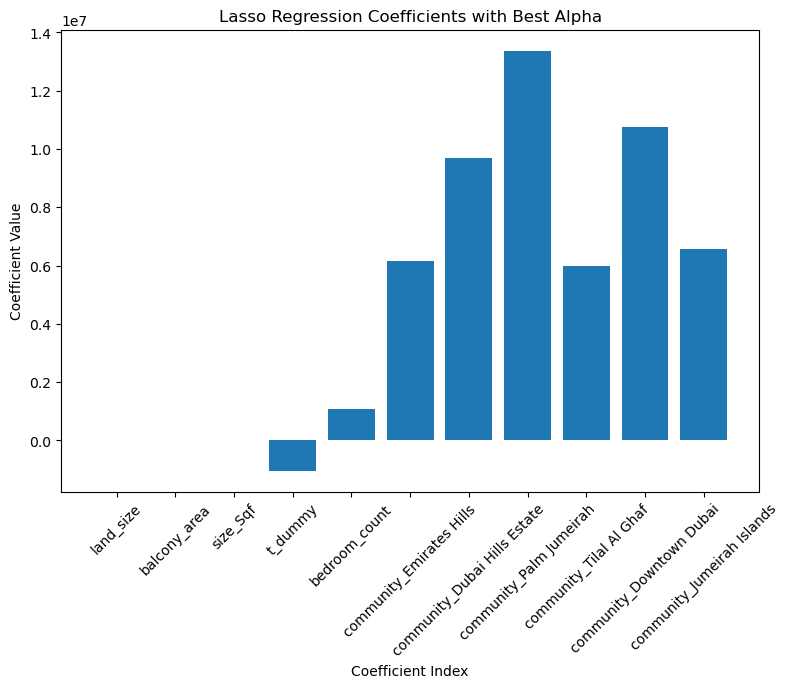

In [149]:
# Plotting the coefficients
plt.figure(figsize=(9, 6))
plt.bar(range(len(lasso_best.coef_)), lasso_best.coef_)
plt.xticks(range(len(lasso_best.coef_)), X.columns, rotation=45)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients with Best Alpha')
plt.show()